# **Labeling**

## **Import Required Libraries**

#### **Description:**
- `cv2`: This is the OpenCV library, used for image processing tasks, such as reading the image, drawing bounding boxes, and manipulating images.
- `matplotlib.pyplot`: A library for plotting and visualizing data. We use it to display images directly within Jupyter notebooks.

In [1]:
import cv2
import matplotlib.pyplot as plt

## **Specify Image and Label Paths**

#### **Description:**
- Specify the paths to the images and labels files. The images are stored in the `images` directory , and the labels are stored in the `labels` directory.

In [2]:
image_path = 'dataset/annotated_dataset/data/images/tile_3_jpg.rf.721dee7d87bb9968ba3a984da8d66673.jpg'
label_path = 'dataset/annotated_dataset/data/labels/tile_3_jpg.rf.721dee7d87bb9968ba3a984da8d66673.txt'

## **Function Description:**

- **Inputs:**
  - `image_path` (str): The path to the image file that you want to visualize.
  - `label_path` (str): The path to the text file containing the label data for the image.

- **Process:**
  1. **Read Image**: The image is loaded from the specified path using OpenCV's `cv2.imread()` function.
  2. **Read Labels**: The label file is opened and read line by line. Each label consists of data such as the class ID and the bounding box (in normalized coordinates: center x, center y, width, height).
  3. **Normalize Coordinates**: The normalized coordinates from the label file (values between 0 and 1) are converted to actual pixel values based on the dimensions of the loaded image.
  4. **Calculate Bounding Box**: For each label, the function calculates the top-left and bottom-right corners of the bounding box.
  5. **Draw Bounding Boxes**: Using OpenCV, it draws a green rectangle around the object described by the label on the image.
  6. **Convert BGR to RGB**: Since OpenCV loads images in BGR format and `matplotlib` expects RGB format, the image is converted using `cv2.cvtColor()`.
  7. **Display Image**: The image is displayed in the notebook using `matplotlib.pyplot.imshow()`, with the axes hidden for clarity.

- **Outputs:**
  - The function does not return any value but displays the image with bounding boxes drawn around the labeled objects.

In [3]:
def visualize_single_image(image_path, label_path):
    image = cv2.imread(image_path)
    
    with open(label_path, 'r') as f:
        labels = f.readlines()
    
    for label in labels:
        parts = label.strip().split()
        class_id, x_center, y_center, width, height = map(float, parts)
        img_height, img_width = image.shape[:2]
        x_center *= img_width
        y_center *= img_height
        width *= img_width
        height *= img_height
        
        x1 = int(x_center - width / 2)
        y1 = int(y_center - height / 2)
        x2 = int(x_center + width / 2)
        y2 = int(y_center + height / 2)
        
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

## **Call the Function**

### **Description:**
- The function is called with the provided paths for the image and label files, which will display the image with the drawn bounding boxes.

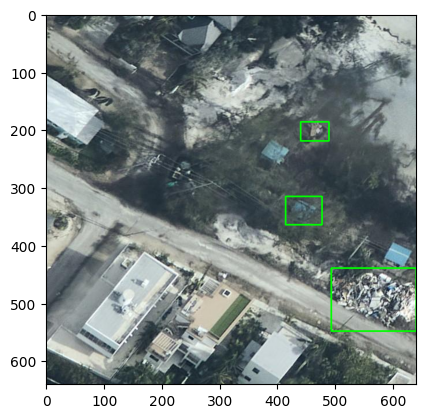

In [4]:
visualize_single_image(image_path, label_path)